In [36]:
import sqlite3
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC , SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, confusion_matrix , roc_auc_score, roc_curve, accuracy_score
import xgboost as xgb
%matplotlib inline

#### Reading the dataframe pickled in previous notebook after cleaning and EDA

In [2]:
fire_clean_model_df = pd.read_pickle("./fire_clean_model.pkl")



In [3]:
fire_clean_model_df.head()



,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,CAUSE_LABEL,AK,AL,AR,AZ,CA,...,VT,WA,WI,WV,WY,DAYS_TO_CONT,fall,spring,summer,winter
1,133,0.25,38.933056,-120.404444,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,152,0.10,38.984167,-120.735556,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,180,0.10,38.559167,-119.913333,0,0,0,0,0,1,...,0,0,0,0,0,5,0,0,1,0
4,180,0.10,38.559167,-119.933056,0,0,0,0,0,1,...,0,0,0,0,0,5,0,0,1,0
5,182,0.10,38.635278,-120.103611,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [4]:
fire_clean_model_df.columns


Index(['DISCOVERY_DOY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'CAUSE_LABEL',
       'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'WY', 'DAYS_TO_CONT', 'fall', 'spring', 'summer',
       'winter'],
      dtype='object')

#### Create X & Y subsets from dataframe

In [5]:
X = fire_clean_model_df.drop(['CAUSE_LABEL'], axis = 1)




In [6]:
Y = fire_clean_model_df['CAUSE_LABEL']



In [7]:
X.columns



Index(['DISCOVERY_DOY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'AK', 'AL', 'AR',
       'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY', 'DAYS_TO_CONT', 'fall', 'spring', 'summer', 'winter'],
      dtype='object')

#### Creating Train Test Validate Subsets

##### Subset for RandomForest/XGBoost/DecisionTree

In [9]:
X_rf = X.copy() #.drop(['STATE','SEASON'], axis = 1)


In [10]:
X_rf.head()



,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,AK,AL,AR,AZ,CA,CO,...,VT,WA,WI,WV,WY,DAYS_TO_CONT,fall,spring,summer,winter
1,133,0.25,38.933056,-120.404444,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,152,0.10,38.984167,-120.735556,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,180,0.10,38.559167,-119.913333,0,0,0,0,1,0,...,0,0,0,0,0,5,0,0,1,0
4,180,0.10,38.559167,-119.933056,0,0,0,0,1,0,...,0,0,0,0,0,5,0,0,1,0
5,182,0.10,38.635278,-120.103611,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [11]:
X_train_val_rf, X_test_rf, y_train_val_rf, y_test_rf = train_test_split(X_rf, Y, test_size=0.2)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_train_val_rf, y_train_val_rf, test_size=.25)



##### Subset for LogisticReg

In [12]:
X_lr = X.drop(['DISCOVERY_DOY','LATITUDE','LONGITUDE'], axis = 1)



In [13]:
X_lr.head()


,FIRE_SIZE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,VT,WA,WI,WV,WY,DAYS_TO_CONT,fall,spring,summer,winter
1,0.25,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,5,0,0,1,0
4,0.10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,5,0,0,1,0
5,0.10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [14]:
X_train_val_lr, X_test_lr, y_train_val_lr, y_test_lr = train_test_split(X_lr, Y, test_size=0.2)
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_train_val_lr, y_train_val_lr, test_size=.25)



#### Initial knn model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_lr, y_train_lr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train_lr, y_train_lr)))
print("Test set: {:6.2f}%".format(100*knn.score(X_val_lr, y_val_lr)))



The score for kNN is


In [ ]:
print("kNN confusion matrix: \n\n", confusion_matrix(y_val_lr, knn.predict(X_val_lr)))



In [ ]:
knn_confusion = confusion_matrix(label_test, knn.predict(X_test))
plt.figure(dpi=100)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=fire_clean_model_df.CAUSE_LABEL,
           yticklabels=fire_clean_model_df.CAUSE_LABEL)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN confusion matrix');

In [ ]:
y_predict_knn = knn.predict(X_val_lr)
print("Default threshold:")
print("Precision: {},   Recall: {}".format(precision_score(y_val_lr, y_predict_knn), 
                                                     recall_score(y_val_lr, y_predict_knn)))

#### Initial Logistic Regression

In [15]:
logit = LogisticRegression(C = 1.0)
logit.fit(X_train_lr, y_train_lr)
print("The score for logistic regression is")
#score returns mean accuracy
print("Training: {:6.2f}%".format(100*logit.score(X_train_lr, y_train_lr)))
print("Test set: {:6.2f}%".format(100*logit.score(X_val_lr, y_val_lr)))



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  87.98%
Test set:  88.06%


In [16]:
y_predict_lr = logit.predict(X_val_lr)
precision_score(y_val_lr, y_predict_lr), recall_score(y_val_lr, y_predict_lr)



(0.907746900421603, 0.9471827663217115)

In [17]:
# plt.figure(figsize=(16,5))
# logit.predict_proba(X_val_lr)


In [18]:
logit.classes_


array([0, 1])

In [19]:
print("Logistic confusion matrix: \n\n", confusion_matrix(y_val_lr, logit.predict(X_val_lr)))


Logistic confusion matrix: 

 [[ 33977  21422]
 [ 11754 210787]]


In [18]:
# for item in zip(X.columns, logit.coef_[0]):
#     print(item)


In [20]:
print(logit.coef_[0].shape)


(58,)


#### Initial Naive Bayes

In [21]:
nb = GaussianNB()
nb.fit(X_train_lr, y_train_lr)
nb.score(X_val_lr, y_val_lr)


0.8178599697776499

In [22]:
y_predict_nb = nb.predict(X_val_lr)
precision_score(y_val_lr, y_predict_nb), recall_score(y_val_lr, y_predict_nb)


(0.9546120445734897, 0.8110820028668875)

In [23]:
print("GaussianNB confusion matrix: \n\n", confusion_matrix(y_val_lr,  nb.predict(X_val_lr)))


GaussianNB confusion matrix: 

 [[ 46817   8582]
 [ 42042 180499]]


In [24]:
nb_B = BernoulliNB()
nb_B.fit(X_train_lr,y_train_lr)
nb_B.score(X_val_lr,y_val_lr)


0.8509210620997337

In [25]:
y_predict_nbb = nb_B.predict(X_val_lr)
precision_score(y_val_lr, y_predict_nbb), recall_score(y_val_lr, y_predict_nbb)


(0.9263484500357829, 0.884102255314751)

In [26]:
print("BernoulliNB confusion matrix: \n\n", confusion_matrix(y_val_lr, nb_B.predict(X_val_lr)))


BernoulliNB confusion matrix: 

 [[ 39756  15643]
 [ 25792 196749]]


#### Initial SVM

In [10]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_model.score(X_val, y_val)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8000251852917896

In [11]:
y_predict = svm_model.predict(X_val)
precision_score(y_val, y_predict), recall_score(y_val, y_predict)


(0.8000237471575372, 0.9999910052124794)

In [12]:
print("SVC Linear confusion matrix: \n\n", confusion_matrix(y_val, svm_model.predict(X_val)))


SVC Linear confusion matrix: 

 [[    10  55579]
 [     2 222349]]


In [ ]:
svm_rbf = SVC(gamma="auto")
svm_rbf.fit(X_train, y_train)
svm_rbf.score(X_val, y_val)


In [ ]:
y_predict = svm_rbf.predict(X_val)
precision_score(y_val, y_predict), recall_score(y_val, y_predict)


In [ ]:
print("SVC RBF confusion matrix: \n\n", confusion_matrix(y_val, svm_rbf.predict(X_val)))


In [ ]:
svm_poly = SVC(kernel="poly", gamma="auto")
svm_poly.fit(X_train, y_train)
svm_poly.score(X_val, y_val)

y_predict = svm_poly.predict(X_val)
precision_score(y_val, y_predict), recall_score(y_val, y_predict)

print("SVC Poly confusion matrix: \n\n", confusion_matrix(y_val, svm_poly.predict(X_val)))



#### Initial Decision Tree

In [27]:
decisiontree = DecisionTreeClassifier(max_depth=4)


decisiontree.fit(X_train_rf, y_train_rf)
decisiontree.score(X_val_rf, y_val_rf)

y_predict_dt = decisiontree.predict(X_val_rf)

print(precision_score(y_val_rf, y_predict_dt), recall_score(y_val_rf, y_predict_dt))

print("\n Decision confusion matrix: \n\n", confusion_matrix(y_val_rf, decisiontree.predict(X_val_rf)))


0.9049814470448099 0.950548609798468

 Decision confusion matrix: 

 [[ 33566  22176]
 [ 10988 211210]]


#### Initial RandomForest

In [28]:
randomforest = RandomForestClassifier(n_estimators=100)


randomforest.fit(X_train_rf, y_train_rf)
randomforest.score(X_val_rf, y_val_rf)

y_predict_rf = randomforest.predict(X_val_rf)

print(precision_score(y_val_rf, y_predict_rf), recall_score(y_val_rf, y_predict_rf))

print("\n Random Forest confusion matrix: \n\n", confusion_matrix(y_val_rf, randomforest.predict(X_val_rf)))


0.9457601796354249 0.9629474612732788

 Random Forest confusion matrix: 

 [[ 43471  12271]
 [  8233 213965]]


In [229]:
y_predict_rf = randomforest.predict(X_test_rf)

print(precision_score(y_test_rf, y_predict_rf), recall_score(y_test_rf, y_predict_rf))

print("\n Random Forest confusion matrix: \n\n", confusion_matrix(y_test_rf, randomforest.predict(X_test_rf)))

0.9460891270961774 0.9625587060576997

 Random Forest confusion matrix: 

 [[ 43678  12181]
 [  8315 213766]]


##### Feature Importance - RandomForest

In [94]:
# print(list(zip(X_val_rf.columns, randomforest.feature_importances_)))


[('DISCOVERY_DOY', 0.27985492031158343), ('FIRE_SIZE', 0.16853934681759145), ('AK', 0.0037175611939843944), ('AL', 0.003927982164842918), ('AR', 0.0011073340319874441), ('AZ', 0.020923641065954124), ('CA', 0.00889622896598748), ('CO', 0.026135055964555554), ('CT', 0.00017713683985848188), ('DC', 2.8214765391105265e-06), ('DE', 2.234870266729783e-05), ('FL', 0.021063872774473646), ('GA', 0.008410207767896888), ('HI', 4.563732938502056e-05), ('IA', 8.626844661659509e-05), ('ID', 0.02256899228714975), ('IL', 0.00011904374406767788), ('IN', 0.00019826618004353206), ('KS', 0.0003040663464884796), ('KY', 0.000769918069891071), ('LA', 0.0023591576410361627), ('MA', 0.00020752875616819645), ('MD', 0.00028523099066022256), ('ME', 0.000558740060551243), ('MI', 0.0010302089832785102), ('MN', 0.0020199881927597287), ('MO', 0.0006001255400579307), ('MS', 0.004885211278906228), ('MT', 0.011289328661799845), ('NC', 0.004569197123314965), ('ND', 0.0012163667450625153), ('NE', 0.0007393658505179018), (

In [29]:
randomforest.predict_proba(X_val_rf.head(9))


array([[0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.81, 0.19],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.02, 0.98]])

In [118]:
indices

array([30, 26, 27, 28, 32, 33, 34, 39, 42, 43, 25, 44, 46, 47, 48, 50, 51,
       53, 54, 55, 57, 45, 24, 60, 14, 12, 11, 10,  7, 15, 16, 17,  5,  4,
       18, 19, 20, 21,  6, 23, 40,  1, 22, 35, 52, 49, 38, 29, 37, 31,  2,
       36, 41, 58,  9, 56,  0, 13,  3,  8, 59])

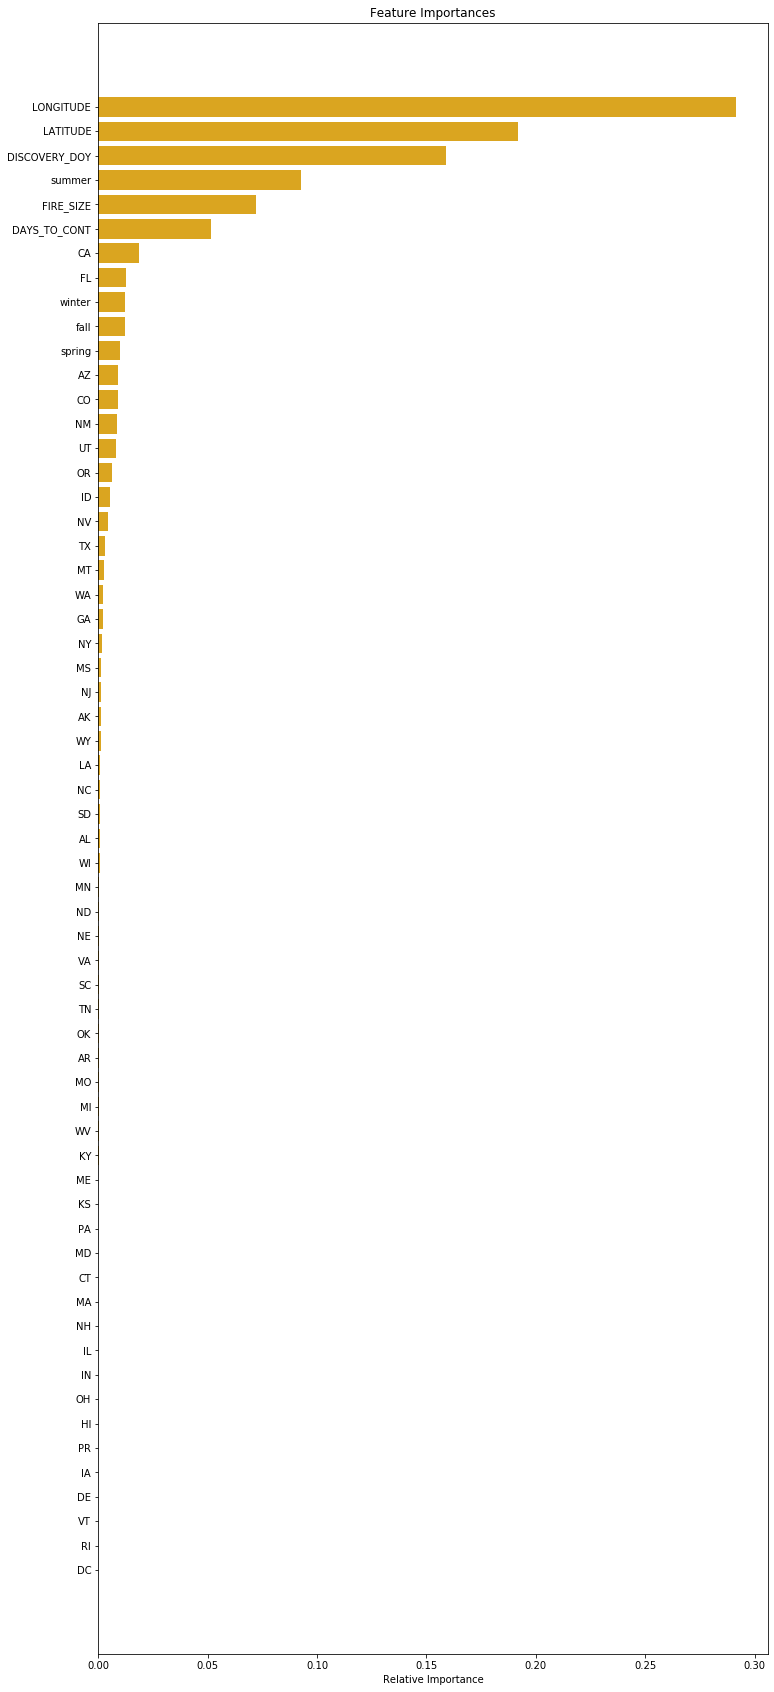

In [30]:
importances = randomforest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='goldenrod', align='center')
plt.yticks(range(len(indices)), [X_val_rf.columns[i] for i in indices])
plt.xlabel('Relative Importance');


#### Ensembling

In [31]:
xg = xgb.XGBClassifier()


xg.fit(X_train_rf, y_train_rf)
xg.score(X_val_rf, y_val_rf)

y_predict_xg = xg.predict(X_val_rf)

print(precision_score(y_val_rf, y_predict_xg), recall_score(y_val_rf, y_predict_xg))

print("\n XGBoost confusion matrix: \n\n", confusion_matrix(y_val_rf, randomforest.predict(X_val_rf)))


0.9215290784228978 0.9499590455359634

 XGBoost confusion matrix: 

 [[ 43471  12271]
 [  8233 213965]]


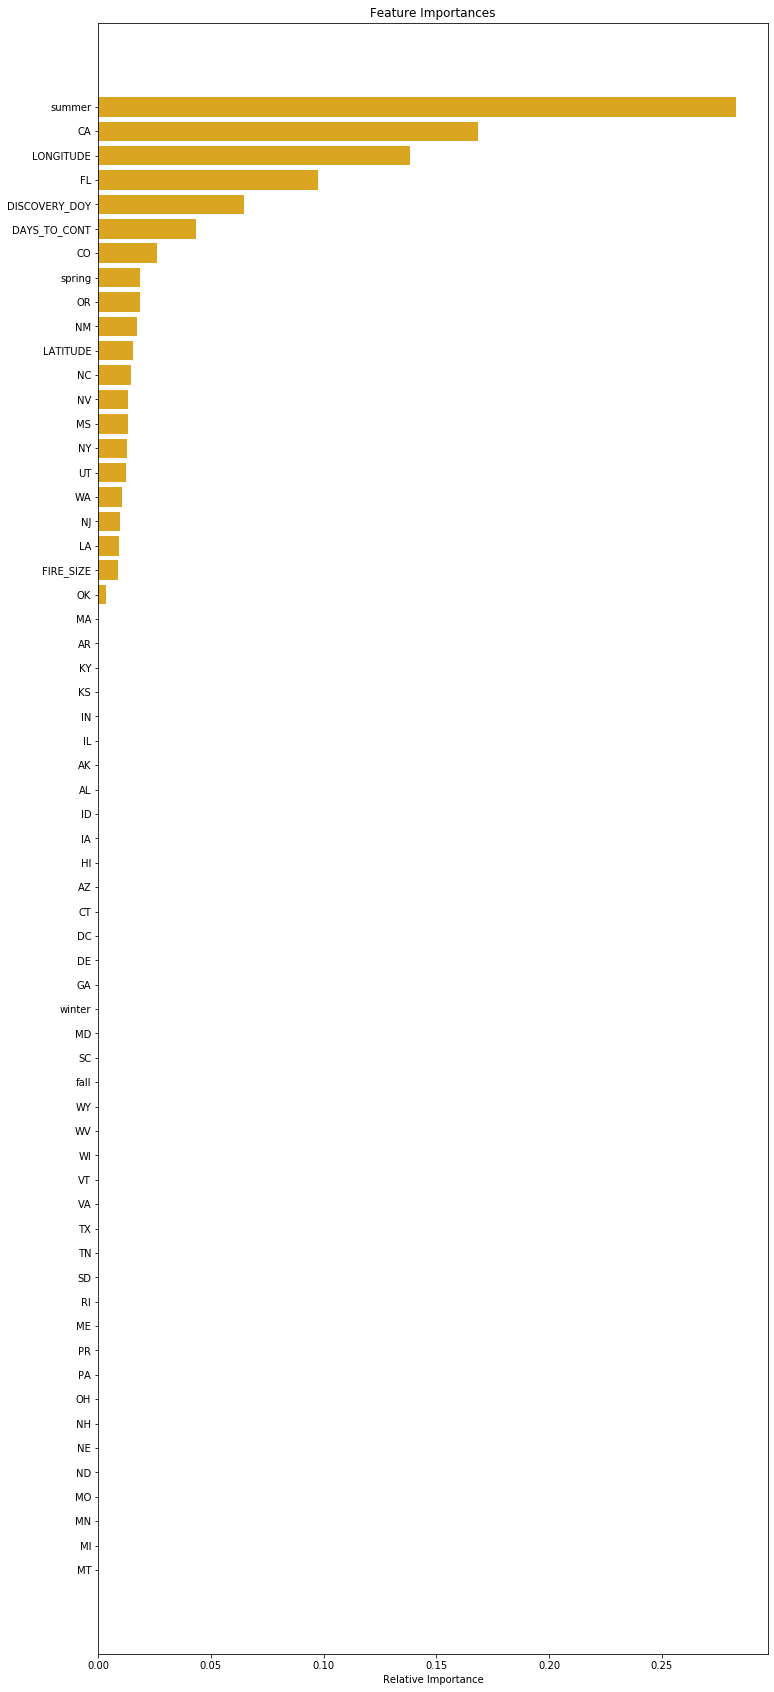

In [32]:
importances = xg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='goldenrod', align='center')
plt.yticks(range(len(indices)), [X_val_rf.columns[i] for i in indices])
plt.xlabel('Relative Importance');


#### ROC Plots

ROC AUC score RandomForest =  0.9606669819638878
ROC AUC score Logistic =  0.9102054541324343
ROC AUC score NB Gaussian =  0.897166799272203
ROC AUC score NB Bernoulli =  0.901426982413032
ROC AUC score Decision Tree =  0.9020529499376299
ROC AUC score XGBoost =  0.9358717780129319


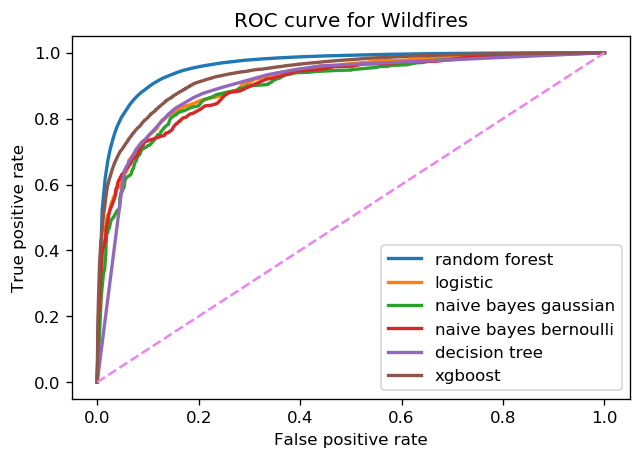

In [33]:
fpr, tpr, thresholds = roc_curve(y_val_rf, randomforest.predict_proba(X_val_rf)[:,1])
fpr_l, tpr_l, thresholds_l = roc_curve(y_val_lr, logit.predict_proba(X_val_lr)[:,1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_val_lr, nb.predict_proba(X_val_lr)[:,1])
fpr_nbb, tpr_nbb, thresholds_nbb = roc_curve(y_val_lr, nb_B.predict_proba(X_val_lr)[:,1])
fpr_d, tpr_d, thresholds_d = roc_curve(y_val_rf, decisiontree.predict_proba(X_val_rf)[:,1])
fpr_x, tpr_x, thresholds_x = roc_curve(y_val_rf, xg.predict_proba(X_val_rf)[:,1])

plt.figure(dpi=120)
plt.plot(fpr, tpr,lw=2, label = 'random forest')
plt.plot(fpr_l, tpr_l,lw=2, label = 'logistic')
plt.plot(fpr_nb, tpr_nb,lw=2, label = 'naive bayes gaussian')
plt.plot(fpr_nbb, tpr_nbb,lw=2, label = 'naive bayes bernoulli')
plt.plot(fpr_d, tpr_d,lw=2, label = 'decision tree')
plt.plot(fpr_x, tpr_x,lw=2, label = 'xgboost')
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend(loc = 'lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Wildfires');
print("ROC AUC score RandomForest = ", roc_auc_score(y_val_rf, randomforest.predict_proba(X_val_rf)[:,1]))
print("ROC AUC score Logistic = ", roc_auc_score(y_val_lr, logit.predict_proba(X_val_lr)[:,1]))
print("ROC AUC score NB Gaussian = ", roc_auc_score(y_val_lr, nb.predict_proba(X_val_lr)[:,1]))
print("ROC AUC score NB Bernoulli = ", roc_auc_score(y_val_lr, nb_B.predict_proba(X_val_lr)[:,1]))
print("ROC AUC score Decision Tree = ", roc_auc_score(y_val_rf, decisiontree.predict_proba(X_val_rf)[:,1]))
print("ROC AUC score XGBoost = ", roc_auc_score(y_val_rf, xg.predict_proba(X_val_rf)[:,1]))


#### Looking at ROC Curves --Random Forest is the best

In [34]:
randomforest.predict_proba(X_val_rf.head(5))


array([[0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.07, 0.93]])

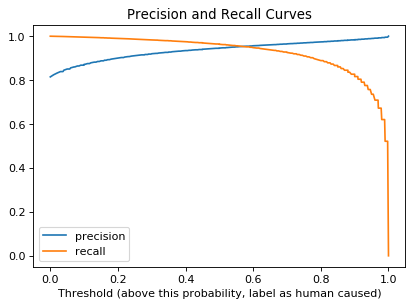

In [35]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val_rf, randomforest.predict_proba(X_val_rf)[:,1] )

plt.figure(dpi=80)

plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as human caused)');
plt.title('Precision and Recall Curves');

In [130]:
threshold = 0.2

predicted_proba = randomforest.predict_proba(X_val_rf)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

recall = recall_score(y_val_rf, predicted)
precision = precision_score(y_val_rf, predicted)


In [230]:
threshold = 0.2

predicted_proba = randomforest.predict_proba(X_test_rf)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

recall = recall_score(y_test_rf, predicted)
precision = precision_score(y_test_rf, predicted)

In [231]:
recall, precision

(0.9900261616257131, 0.8979326793488471)

In [191]:
limit = 0
for index, row in X_val_rf.iterrows():
    score = randomforest.predict_proba([row])[0][1]
    if score <= 0.2:
        print(row)
    limit +=1
    if limit >= 10:
        break


DISCOVERY_DOY    220.000000
FIRE_SIZE          0.500000
LATITUDE          44.852778
LONGITUDE       -119.520278
AK                 0.000000
AL                 0.000000
AR                 0.000000
AZ                 0.000000
CA                 0.000000
CO                 0.000000
CT                 0.000000
DC                 0.000000
DE                 0.000000
FL                 0.000000
GA                 0.000000
HI                 0.000000
IA                 0.000000
ID                 0.000000
IL                 0.000000
IN                 0.000000
KS                 0.000000
KY                 0.000000
LA                 0.000000
MA                 0.000000
MD                 0.000000
ME                 0.000000
MI                 0.000000
MN                 0.000000
MO                 0.000000
MS                 0.000000
                    ...    
NC                 0.000000
ND                 0.000000
NE                 0.000000
NH                 0.000000
NJ                 0

In [42]:
X_val_rf.head()

,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,AK,AL,AR,AZ,CA,CO,...,VT,WA,WI,WV,WY,DAYS_TO_CONT,fall,spring,summer,winter
29533,220,0.5,44.852778,-119.520278,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,0
656686,356,1.0,30.543610,-95.861960,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1032563,76,1.0,35.585000,-78.455000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
301348,46,1.5,33.300300,-110.451800,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1349863,127,1.0,42.600087,-75.608740,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [50]:
X_val_rf.head(1)

,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,AK,AL,AR,AZ,CA,CO,...,VT,WA,WI,WV,WY,DAYS_TO_CONT,fall,spring,summer,winter
29533,220,0.5,44.852778,-119.520278,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,0


In [49]:
state_list = ['AK', 'AL', 'AR',
       'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY']

In [70]:
season_list = ['summer','fall','spring','winter']

#### Pickle Model to save for later

In [37]:
saved_model_rf = pickle.dumps(randomforest)

In [57]:
s = {}
s_list = ['summer','fall','spring','winter']

for st in s_list:
    if st == 'fall':
        s[st] = 1
    else:
        s[st] = 0

s

{'summer': 0, 'fall': 1, 'spring': 0, 'winter': 0}

In [55]:
X_val_rf.columns

Index(['DISCOVERY_DOY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'AK', 'AL', 'AR',
       'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY', 'DAYS_TO_CONT', 'fall', 'spring', 'summer', 'winter'],
      dtype='object')

#### Wrap the predict in a func to pass to the tabpy client

In [226]:
def predict_class(discovery_date, contain_date, fire_size, latitude, longitude, state):
    
    discovery_date = discovery_date[0]
    contain_date = contain_date[0]
    fire_size = fire_size[0]
    latitude = latitude[0]
    longitude = longitude[0]
    state = state[0]
    
    #state dummies
    dict_st = {}
    for st in state_list:
        if st == state:
            dict_st[st] = 1
        else:
            dict_st[st] = 0
    
    #Discovery DayOfYear
    discovery_date = datetime.datetime.strptime(discovery_date, '%Y/%m/%d')
    dict_st['DISCOVERY_DOY'] = discovery_date.timetuple().tm_yday
    discovery_doy = discovery_date.timetuple().tm_yday
    
    #days to cont
    contain_date = datetime.datetime.strptime(str(contain_date), '%Y/%m/%d')
    dict_st['DAYS_TO_CONT'] = int((contain_date - discovery_date).days)
    
    #fire size, lat, long
    dict_st['FIRE_SIZE'] = fire_size
    dict_st['LATITUDE'] = latitude
    dict_st['LONGITUDE'] = longitude
    
    #season
    if discovery_doy in range(80,172):
        season = 'spring'
    elif discovery_doy in range(173,264):
        season = 'summer'
    elif discovery_doy in range(265,355):
        season = 'fall'
    else:
        season = 'winter'
    
    s_dict = {}
    for s in season_list:
        if s == season:
            dict_st[s] = 1
        else:
            dict_st[s] = 0
        
    X = pd.DataFrame(data = dict_st, index=[0])
    
    cols = ['DISCOVERY_DOY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE',
       'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'DAYS_TO_CONT',
       'fall', 'spring', 'summer', 'winter']
    X = X[cols]

    model_score = randomforest.predict_proba(X)[0][1]
    
    threshold = 0.2

    if model_score > threshold:
        return 'Human Caused'
    else:
        return 'Natural'

In [227]:
predict_class(['2017/08/08'],['2017/08/21'],[0.5],[44.852778],[-119.520278],['OR'])


'Natural'

In [99]:
randomforest.predict_proba(X_val_rf.head(5))


array([[0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.07, 0.93]])

In [101]:
y_val_rf.head(5)

29533      0
656686     1
1032563    1
301348     1
1349863    1
Name: CAUSE_LABEL, dtype: int64

In [104]:
X_val_rf.head(1)

,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,AK,AL,AR,AZ,CA,CO,...,VT,WA,WI,WV,WY,DAYS_TO_CONT,fall,spring,summer,winter
29533,220,0.5,44.852778,-119.520278,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,0


In [115]:
X.loc[29532:29534]

,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,AK,AL,AR,AZ,CA,CO,...,VT,WA,WI,WV,WY,DAYS_TO_CONT,fall,spring,summer,winter
29532,220,0.1,44.931667,-118.888056,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29533,220,0.5,44.852778,-119.520278,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,0
29534,220,375.0,45.235556,-117.444167,0,0,0,0,0,0,...,0,0,0,0,0,71,0,0,1,0


### TabPy - deploy model (RandomForest)

In [84]:
from tabpy_tools.client import Client

client = Client('http://localhost:9004/')

In [228]:
client.deploy('Predict_Cause',predict_class,'Function to predict whether a wildfire is natural or human caused', override= True)